<a href="https://colab.research.google.com/github/Shrason/Projects/blob/main/Capstone%20Project%20-%20Fitbit%20Consumer%20Behaviour%20Analysis/Fitbit_Hourly_Activity_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitbit Consumer Behavior Analysis

**Importing Libraries**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

**Loading data**

---



In [ ]:
data_1 = pd.read_csv('/content/hourlyCalories_merged.csv')
data_2 = pd.read_csv('/content/hourlyIntensities_merged.csv')
data_3 = pd.read_csv('/content/hourlySteps_merged.csv')


In [ ]:
print(data_1.shape)
print(data_2.shape)
print(data_3.shape)

(22099, 3)
(22099, 4)
(22099, 3)


In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [ ]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [ ]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [ ]:
data_merged = data_3.merge(data_2)

In [ ]:
data = data_merged.merge(data_1)

In [ ]:
data.shape

(22099, 6)

In [ ]:
data.head()

,Id,ActivityHour,StepTotal,TotalIntensity,AverageIntensity,Calories
0,1503960366,4/12/2016 12:00:00 AM,373,20,0.333333,81
1,1503960366,4/12/2016 1:00:00 AM,160,8,0.133333,61
2,1503960366,4/12/2016 2:00:00 AM,151,7,0.116667,59
3,1503960366,4/12/2016 3:00:00 AM,0,0,0.000000,47
4,1503960366,4/12/2016 4:00:00 AM,0,0,0.000000,48


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   StepTotal         22099 non-null  int64  
 3   TotalIntensity    22099 non-null  int64  
 4   AverageIntensity  22099 non-null  float64
 5   Calories          22099 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.7+ MB


**Data Cleaning**

---



In [ ]:
data.columns = data.columns.str.lower()

In [ ]:
data.columns

Index(['id', 'activityhour', 'steptotal', 'totalintensity', 'averageintensity',
       'calories'],
      dtype='object')

In [ ]:
data.rename(columns={'activityhour':'activity_hour', 'steptotal':'step_total', 'totalintensity':'total_intensity', 'averageintensity':'average_intensity'},inplace=True)

In [ ]:
data['activity_hour'] = pd.to_datetime(data['activity_hour'])

In [ ]:
data['activity_hour'].dtype

dtype('<M8[ns]')

**Univariate Analysis**

---



**_Non Visual Analysis**

In [ ]:
def numerical_data(numerical_feature):
  for col in numerical_feature:
    print('*'*5, col, '*'*5)
    print(numerical_feature[col].agg(['count', 'nunique', 'mean','max','min','std','skew','kurtosis']))
    print()


In [ ]:
numerical_data(data[['step_total', 'total_intensity', 'average_intensity',
       'calories']])

***** step_total *****
count       22099.000000
nunique      2222.000000
mean          320.166342
max         10554.000000
min             0.000000
std           690.384228
skew            4.832214
kurtosis       34.200632
Name: step_total, dtype: float64

***** total_intensity *****
count       22099.000000
nunique       175.000000
mean           12.035341
max           180.000000
min             0.000000
std            21.133110
skew            3.450948
kurtosis       15.833180
Name: total_intensity, dtype: float64

***** average_intensity *****
count       22099.000000
nunique       175.000000
mean            0.200589
max             3.000000
min             0.000000
std             0.352219
skew            3.450948
kurtosis       15.833181
Name: average_intensity, dtype: float64

***** calories *****
count       22099.000000
nunique       442.000000
mean           97.386760
max           948.000000
min            42.000000
std            60.702622
skew            4.197748
kurtosis 

**_Visual Analysis**

In [ ]:
df = data[['step_total', 'total_intensity', 'average_intensity',
       'calories']]

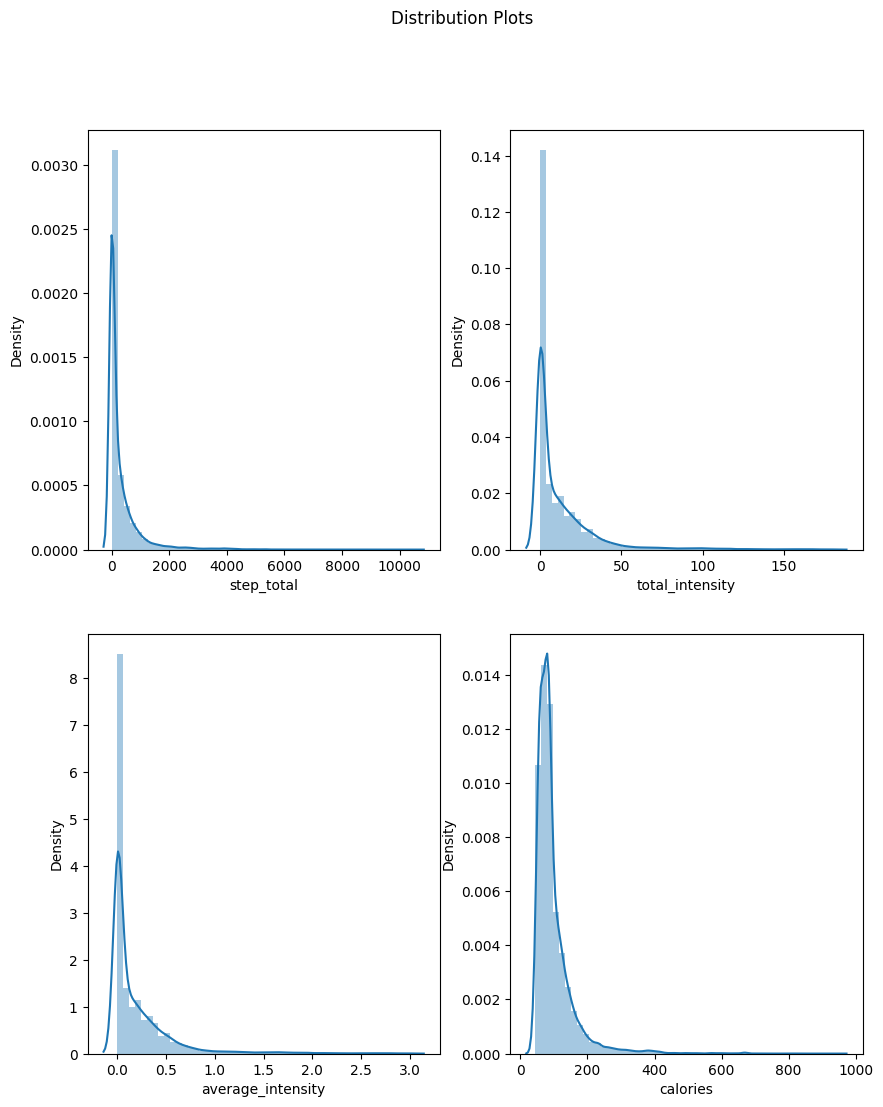

In [ ]:
fig ,axes = plt.subplots(nrows=int(np.ceil(len(df.columns)/2)),
ncols=2,figsize=(10,12))
for i, column in enumerate(df.columns):
  row = int(i//2)
  col = i%2
  sns.distplot(df[column],ax=axes[row,col])
  fig.suptitle("Distribution Plots")

plt.show()

step_total              Axes(0.125,0.798085;0.227941x0.0819149)
total_intensity      Axes(0.398529,0.798085;0.227941x0.0819149)
average_intensity    Axes(0.672059,0.798085;0.227941x0.0819149)
calories                Axes(0.125,0.699787;0.227941x0.0819149)
dtype: object

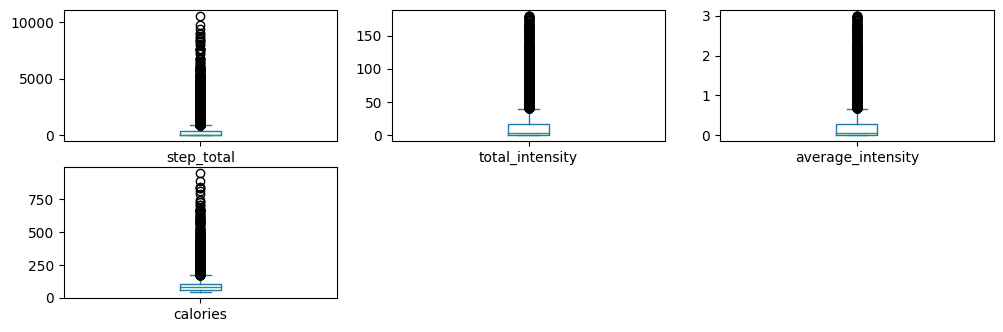

In [ ]:
df.plot(kind='box',subplots=True,layout=(8,3),figsize=(12,16))

Univariate Analysis Observation:
- All the features in data are right skewed.
- All the features in data have outliers.

**Bivariate Analysis**

---



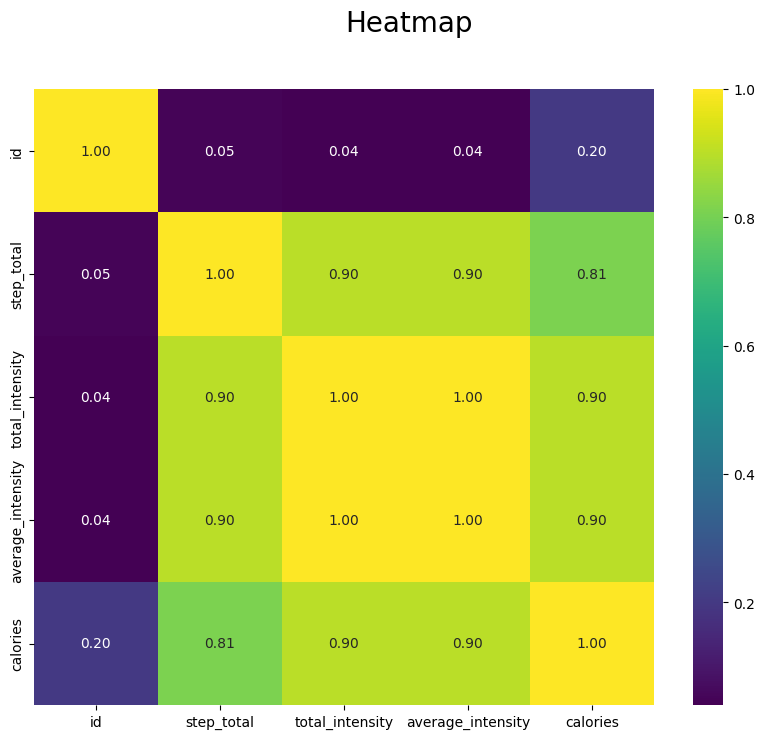

In [ ]:
f,ax = plt.subplots(figsize=(10,8))
corr = data.corr()
hm = sns.heatmap(round(corr,2),annot=True, cmap='viridis',fmt='.2f')
t=f.suptitle('Heatmap',fontsize=20)

- Total steps, total intensity, average intensity and calories are highly correlated.

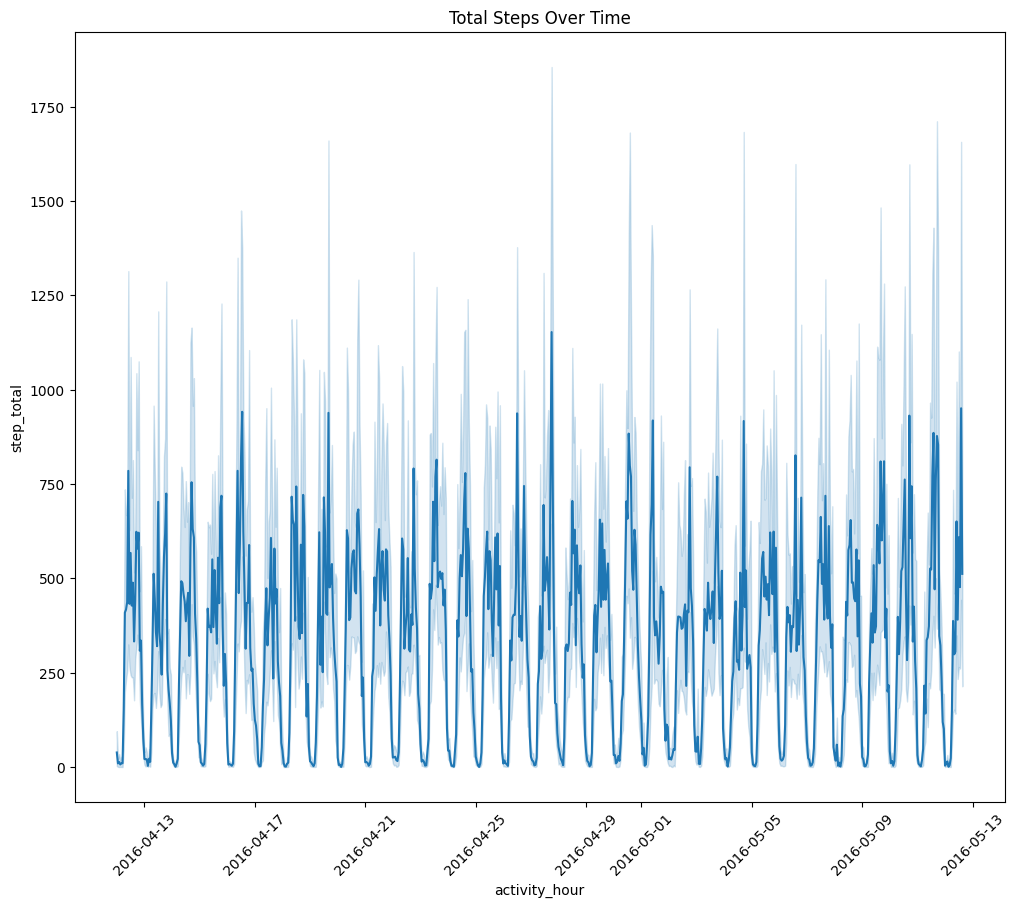

In [ ]:
plt.figure(figsize=(12, 10))
sns.lineplot(x='activity_hour', y='step_total', data=data)
plt.title('Total Steps Over Time')
plt.xticks(rotation=45)
plt.show()

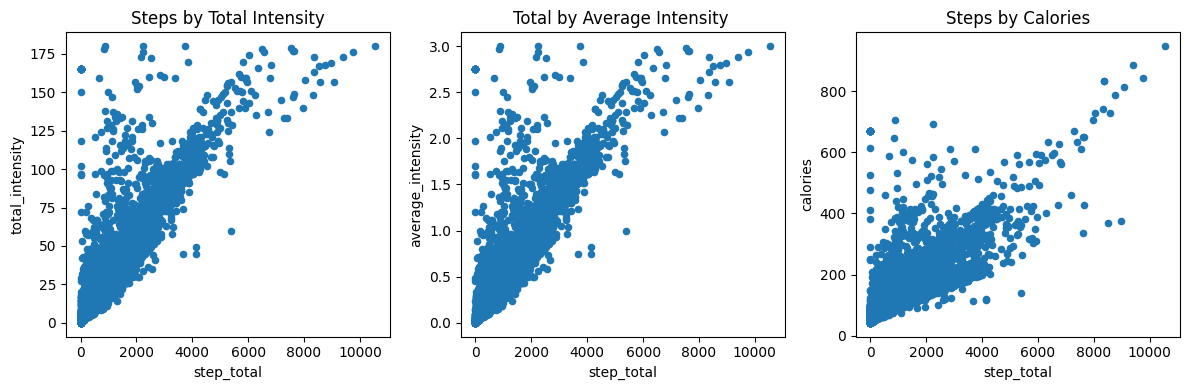

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(12,4))
data.plot(kind='scatter', x='step_total', y='total_intensity',ax=axes[0])
axes[0].set_title('Steps by Total Intensity')

data.plot(kind='scatter', x='step_total',y='average_intensity', ax=axes[1])
axes[1].set_title('Total by Average Intensity ')

data.plot(kind='scatter', x='step_total', y='calories',ax=axes[2])
axes[2].set_title('Steps by Calories')

plt.tight_layout()
plt.show()

- Total steps , total intensity and average intensity are almost linearly correlated.
- For burning 300-400 calories, total steps ranges from 1000-4000.

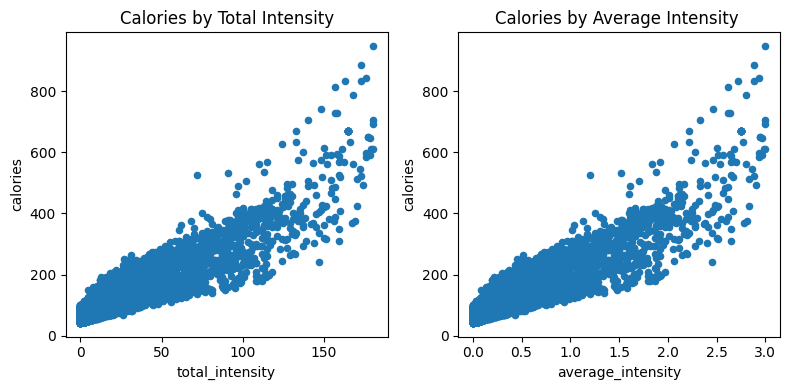

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(8,4))
data.plot(kind='scatter', x='total_intensity', y='calories',ax=axes[0])
axes[0].set_title('Calories by Total Intensity')

data.plot(kind='scatter', x='average_intensity',y='calories', ax=axes[1])
axes[1].set_title('Calories by Average Intensity ')

plt.tight_layout()
plt.show()

- To burn 200 calories, total intensity requirement is around 50 and above.

In [ ]:
data_steps_id = data.groupby(['id'])['step_total'].mean()

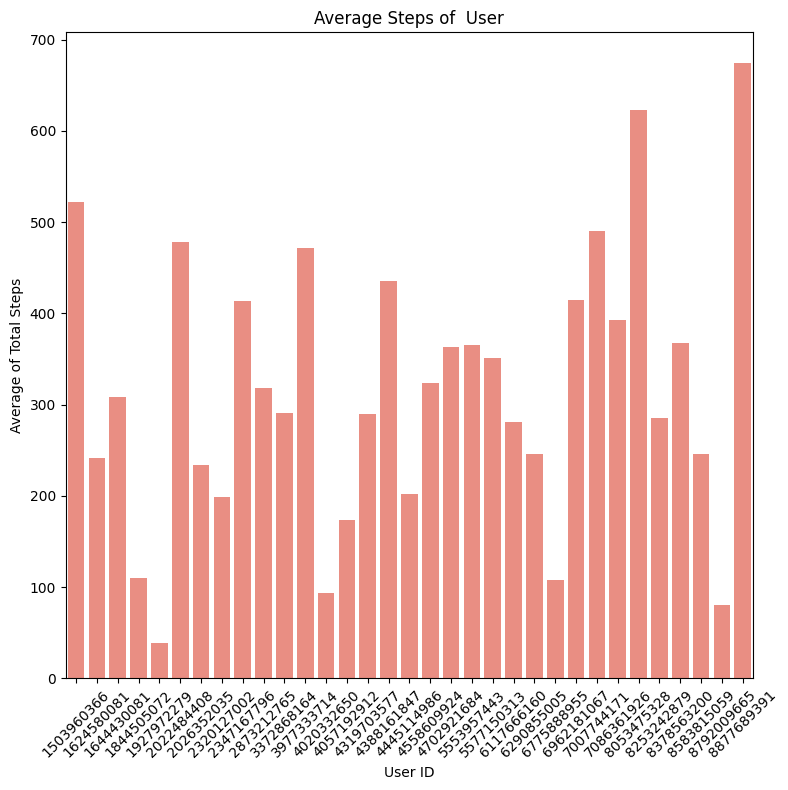

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x=data_steps_id.index, y=data_steps_id.values,color='salmon')
plt.xlabel('User ID')
plt.ylabel('Average of Total Steps')
plt.title('Average Steps of  User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The average steps per hour of most  users is around 200 minimum.

In [ ]:
data_intensity_id = data.groupby(['id'])['total_intensity'].mean()

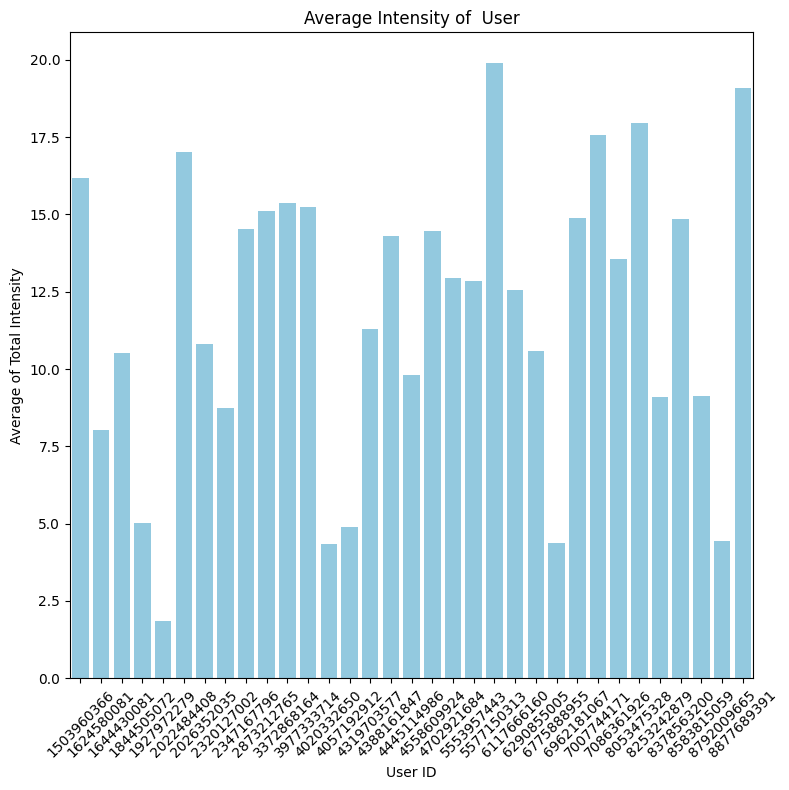

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x=data_intensity_id.index, y=data_intensity_id.values,color='skyblue')
plt.xlabel('User ID')
plt.ylabel('Average of Total Intensity')
plt.title('Average Intensity of  User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The average total intensity of all user is around 5 and above.

In [ ]:
data_calories_id = data.groupby(['id'])['calories'].mean()

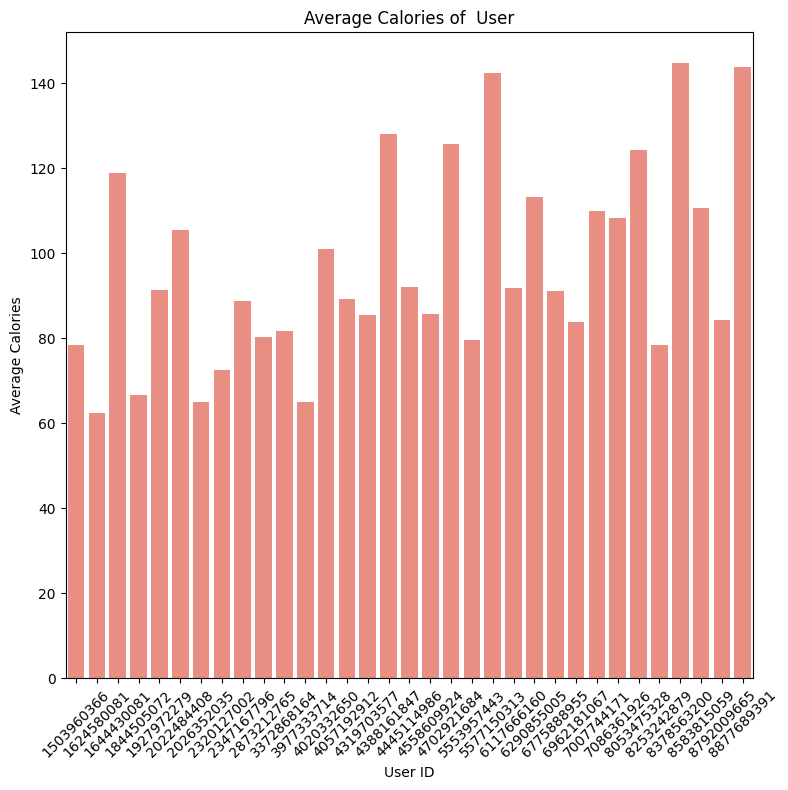

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x=data_calories_id.index, y=data_calories_id.values,color='salmon')
plt.xlabel('User ID')
plt.ylabel('Average Calories')
plt.title('Average Calories of  User')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The average calories burned of all users is around 60 and above.

In [ ]:
data['hour'] = data['activity_hour'].dt.hour

In [ ]:
data_activity_id = data.groupby(['hour'])['total_intensity'].mean()

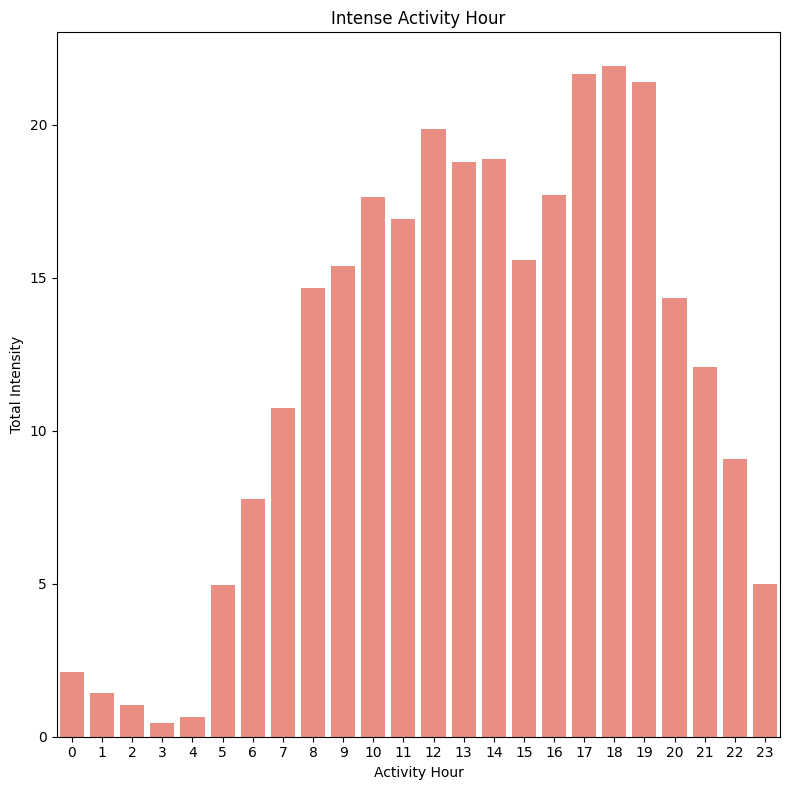

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(x=data_activity_id.index, y=data_activity_id.values,color='salmon')
plt.xlabel('Activity Hour')
plt.ylabel('Total Intensity')
plt.title('Intense Activity Hour')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 17 to 19 are the highest intensity hours of the day.

Overall Observations:
- Total steps , total intensity and average intensity are almost linearly correlated.
- For burning 300-400 calories, total steps ranges from 1000-4000.
- To burn 200 calories, total intensity requirement is around 50 and above.
- The average steps per hour of most users is around 200 minimum.
- The average total intensity per hour of all user is around 5 minimum.
- The average calories burned per hour of all users is around 60 minimum.
- 17 to 19 are the highest intensity hours of the day.